SMART HOME ENERGY ANALYSIS

In [2]:
#import libraries
import pandas as pd
import numpy as np

In [3]:
#load dataset
df = pd.read_csv(r'C:\Users\navee\OneDrive\Desktop\HR ANALYTICS\Smart home energy\smart_home_energy.csv')

DATA EXPLORATION

In [5]:
print("First five rows and columns")
df.head(5)

First five rows and columns


,date,time,room,appliance,units_used
0,2024-01-07,08:00,Bedroom,Lights,1.06
1,2024-01-20,11:00,Balcony,Induction Stove,113.31
2,2024-01-29,10:00,Bedroom,Refrigerator,2.41
3,2024-01-15,10:00,Study Room,AC,2.21
4,2024-01-11,17:00,Living Room,Washing Machine,1.65


In [6]:
print("Data set columns")
df.columns.tolist()

Data set columns


['date', 'time', 'room', 'appliance', 'units_used']

In [7]:
print("Data Type")
df.info()

Data Type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010000 entries, 0 to 1009999
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   date        1010000 non-null  object 
 1   time        989895 non-null   object 
 2   room        988297 non-null   object 
 3   appliance   989800 non-null   object 
 4   units_used  989915 non-null   float64
dtypes: float64(1), object(4)
memory usage: 38.5+ MB


In [8]:
print("Check Nulls")
df.isnull().sum()

Check Nulls


date              0
time          20105
room          21703
appliance     20200
units_used    20085
dtype: int64

In [9]:
print("Check Duplicates")
df.duplicated().sum()

Check Duplicates


64948

DATA CLEANING

In [11]:
df = df.replace(["None", "none", "nan", "", " "], np.nan)

In [12]:
df = df.drop_duplicates()

In [13]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [14]:
df["time"] = pd.to_datetime(df["time"], format="%H:%M", errors="coerce")

In [15]:
df["time"] = df["time"].dt.time

In [16]:
df["units_used"] = pd.to_numeric(df["units_used"], errors="coerce")

In [17]:
df.loc[df["units_used"] <= 0, "units_used"] = np.nan

In [18]:
df.isnull().sum()

date             0
time          5182
room          1767
appliance      234
units_used    2128
dtype: int64

In [19]:
df["room"] = df["room"].fillna("Unknown")
df["appliance"] = df["appliance"].fillna("Unknown")

In [20]:
df["units_used"] = df["units_used"].fillna(df["units_used"].median())

In [21]:
df = df.dropna(subset=["time"])

In [22]:
df = df.reset_index(drop=True)

FEATURE ENGINEERING

In [24]:
df["datetime"] = pd.to_datetime(df["date"].astype(str) + " " + df["time"].astype(str))

In [25]:
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["month"] = df["datetime"].dt.month
df["weekday"] = df["datetime"].dt.day_name()

In [26]:
df["is_weekend"] = df["weekday"].isin(["Saturday", "Sunday"])

In [27]:
def part_of_day(hr):
    if 5 <= hr < 12:
        return "Morning"
    elif 12 <= hr < 17:
        return "Afternoon"
    elif 17 <= hr < 22:
        return "Evening"
    else:
        return "Night"

df["day_part"] = df["hour"].apply(part_of_day)        

In [28]:
df["appliance_type"] = df["appliance"].map({
    "TV": "Entertainment",
    "Induction Stove": "Kitchen",
    "Geyser": "Bathroom"
}).fillna("Other")

In [29]:
daily_usage = df.groupby("date")["units_used"].sum().reset_index()

In [30]:
room_usage = df.groupby(["date", "room"])["units_used"].sum().reset_index()

In [31]:
df.to_csv(r'C:\Users\navee\OneDrive\Desktop\HR ANALYTICS\Smart home energy\Cleaned_smart_home_energy.csv', index=False)

EXTRACTING HELPFUL INSIGHTS WITH CLEANED DATA 

In [33]:
import matplotlib.pyplot as plt

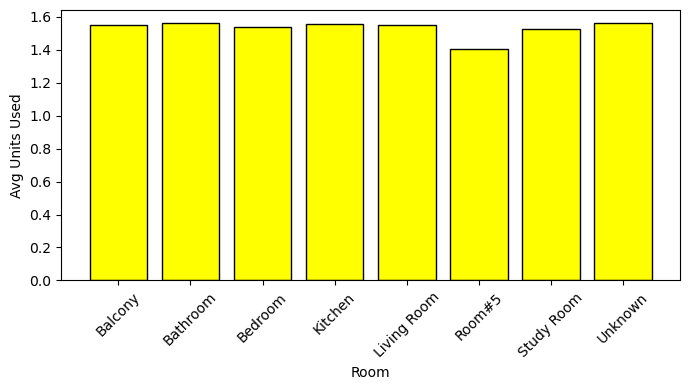

In [34]:
#Average Energy Usage by Room

room_usage = df.groupby('room')['units_used'].mean()

plt.figure(figsize=(7,4))
plt.bar(room_usage.index, room_usage.values, color='yellow', edgecolor='black')
plt.xlabel("Room")
plt.ylabel("Avg Units Used")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_energy_by_room.png", dpi=300)
plt.show()

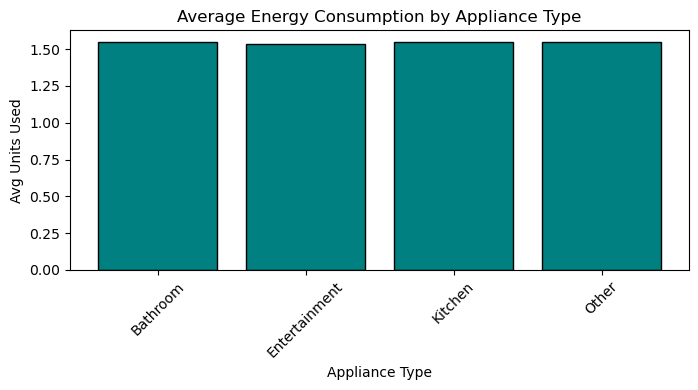

In [35]:
#Energy Usage by Appliance Type

type_usage = df.groupby('appliance_type')['units_used'].mean()

plt.figure(figsize=(7,4))
plt.bar(type_usage.index, type_usage.values, color='teal', edgecolor='black')
plt.title("Average Energy Consumption by Appliance Type")
plt.xlabel("Appliance Type")
plt.ylabel("Avg Units Used")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("energy_by_appliance_type.png", dpi=300)
plt.show()

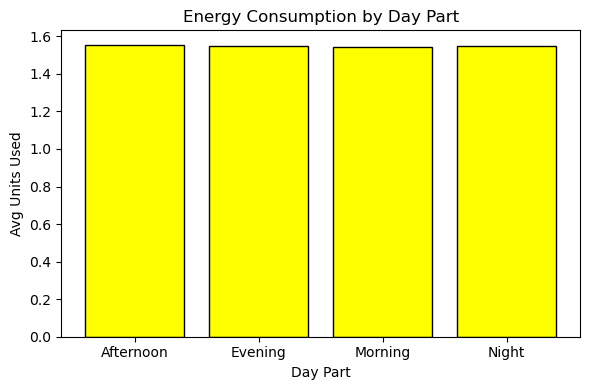

In [36]:
#Energy Usage by Day Part

day_part_usage = df.groupby('day_part')['units_used'].mean()

plt.figure(figsize=(6,4))
plt.bar(day_part_usage.index, day_part_usage.values, color='yellow', edgecolor='black')
plt.title("Energy Consumption by Day Part")
plt.xlabel("Day Part")
plt.ylabel("Avg Units Used")
plt.tight_layout()
plt.savefig("energy_by_day_part.png", dpi=300)
plt.show()

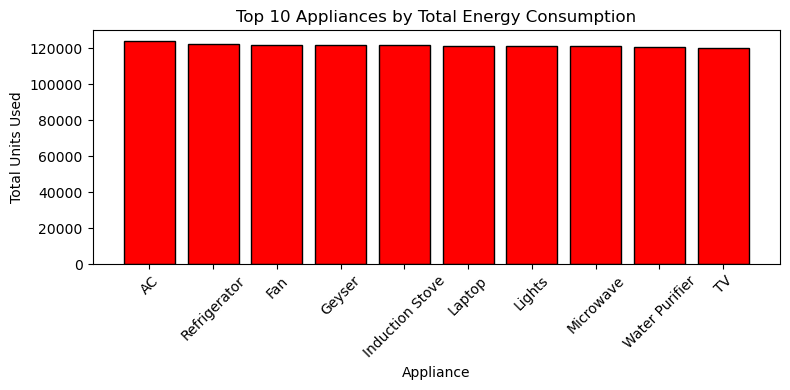

In [37]:
#Top 10 Most Power Consuming Appliances

top_appliances = df.groupby('appliance')['units_used'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(top_appliances.index, top_appliances.values, color='red', edgecolor='black')
plt.title("Top 10 Appliances by Total Energy Consumption")
plt.xlabel("Appliance")
plt.ylabel("Total Units Used")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_10_appliances.png", dpi=300)
plt.show()

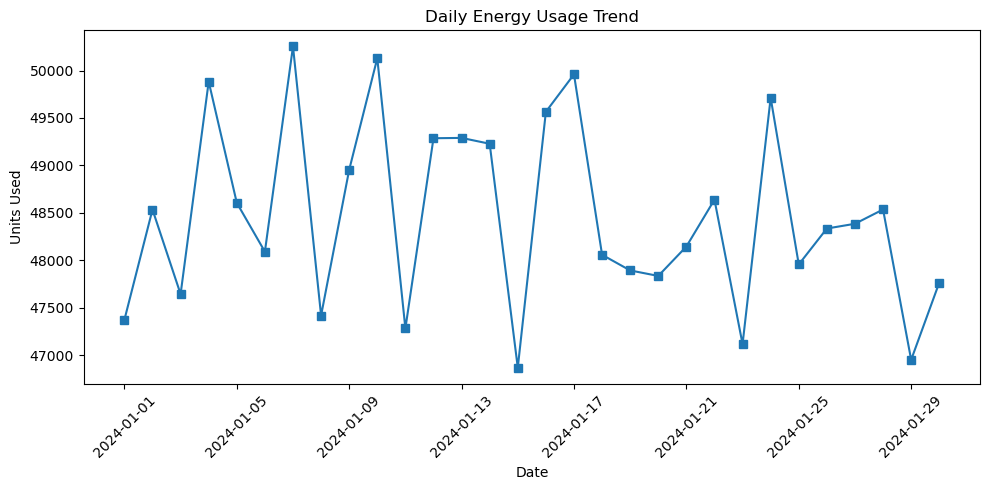

In [38]:
#Daily Energy Consumption Trend

daily_usage = df.groupby('date')['units_used'].sum().reset_index()

plt.figure(figsize=(10,5))

plt.plot(daily_usage['date'], daily_usage['units_used'], marker='s')
plt.title("Daily Energy Usage Trend")
plt.xlabel("Date")
plt.ylabel("Units Used")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("daily_energy_trend.png")
plt.show()

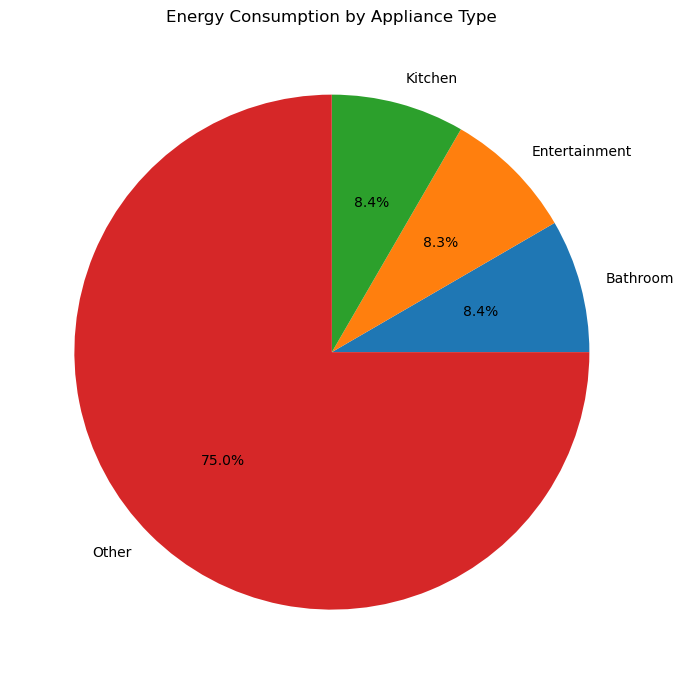

In [39]:
#Energy Usage Distribution by Appliance Type

appliance_usage = df.groupby('appliance_type')['units_used'].sum()

plt.figure(figsize=(7,7))
plt.pie(appliance_usage, labels=appliance_usage.index, autopct='%1.1f%%')
plt.title("Energy Consumption by Appliance Type")
plt.tight_layout()
plt.savefig("appliance_type_pie.png")
plt.show()